In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory


In [27]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [28]:


train ='/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/train'
train_dataset=image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,)


Found 76515 files belonging to 4 classes.


In [43]:


test ='/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/test'
test_dataset=image_dataset_from_directory(
    test,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,)


Found 10933 files belonging to 4 classes.


In [30]:


val ='/kaggle/input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/val'
val_dataset=image_dataset_from_directory(
    val,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,)


Found 21861 files belonging to 4 classes.


In [31]:
train_dataset.class_names


['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [32]:

# mobnet = tf.keras.applications.MobileNetV3Large(
#     input_shape=(224, 224, 3),
#     alpha=1.0,
#     minimalistic=False,
#     include_top=True,
#     weights=None,  # Important: prevent downloading from internet
#     classes=1000,
#     classifier_activation="softmax"
# )

# # Load the local weights
# mobnet.load_weights("/kaggle/input/mobilenetv3large-local-weights/tensorflow2/default/1/weights_mobilenet_v3_large_224_1.0_float.h5")


In [33]:
mobnet=tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    #name="MobileNetV3Large",
)

In [34]:
model=tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(224, 224, 3)))
model.add(mobnet)
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))


In [35]:
metricslist=['accuracy',tf.keras.metrics.F1Score()]

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
    loss= 'categorical_crossentropy' ,
    metrics=metricslist
)

In [37]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)        │ (None, 1000)                │       5,507,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           4,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [38]:
TrainingHistory = model.fit(
    x=train_dataset,
    validation_data=val_dataset,  
    epochs=8
)


Epoch 1/8


I0000 00:00:1744689919.846939     101 service.cc:148] XLA service 0x79f2c0003e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744689919.850050     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744689919.850072     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744689923.715486     101 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1744689932.397427     101 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744689932.536678     101 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744689932.946972     101 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. Th

2392/2392 ━━━━━━━━━━━━━━━━━━━━ 324s 107ms/step - accuracy: 0.7936 - f1_score: 0.4370 - loss: 1.2361 - val_accuracy: 0.8094 - val_f1_score: 0.4437 - val_loss: 0.9687
Epoch 2/8
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 220s 92ms/step - accuracy: 0.8477 - f1_score: 0.5787 - loss: 0.8962 - val_accuracy: 0.8943 - val_f1_score: 0.6887 - val_loss: 0.7233
Epoch 3/8
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 226s 94ms/step - accuracy: 0.9167 - f1_score: 0.7916 - loss: 0.6700 - val_accuracy: 0.9617 - val_f1_score: 0.9316 - val_loss: 0.5450
Epoch 4/8
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 227s 95ms/step - accuracy: 0.9587 - f1_score: 0.9291 - loss: 0.5127 - val_accuracy: 0.9621 - val_f1_score: 0.9320 - val_loss: 0.4310
Epoch 5/8
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 226s 95ms/step - accuracy: 0.9636 - f1_score: 0.9366 - loss: 0.3999 - val_accuracy: 0.9635 - val_f1_score: 0.9346 - val_loss: 0.3461
Epoch 6/8
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 226s 95ms/step - accuracy: 0.9677 - f1_score: 0.9433 - loss: 0.3116 - val_accuracy: 0.9672 - val_f

In [39]:
model.save('/kaggle/working/my_model.h5')


In [40]:
import pickle
data_to_save = TrainingHistory.history  
with open('TrainingHistory.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)


In [44]:

with open('/kaggle/working/TrainingHistory.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'accuracy': [0.8033196330070496,
  0.8767169713973999,
  0.9355159401893616,
  0.95986407995224,
  0.9631052613258362,
  0.9682807326316833,
  0.9734039306640625,
  0.9774684906005859],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8095966, 0.0009828, 0.       , 0.9524179], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.86538774, 0.79825664, 0.        , 0.97632414], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9332641, 0.9266909, 0.6626754, 0.9795726], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9647194 , 0.9388032 , 0.83886737, 0.98234224], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9674676 , 0.94241613, 0.85136944, 0.9841797 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9719385 , 0.95517766, 0.86621886, 0.9864909 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9769056 , 0.95917356, 0.8922345 ,

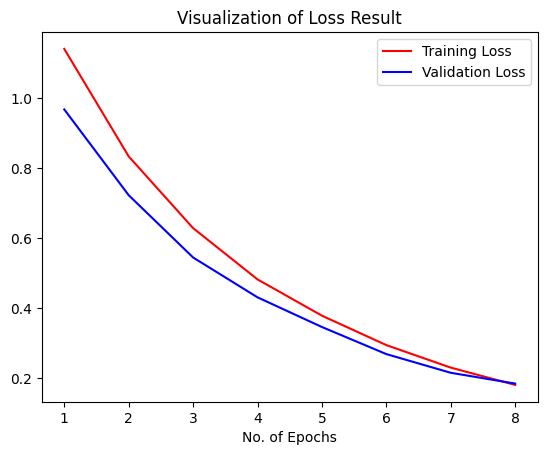

In [45]:
epochs = [i for i in range(1,9)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()